In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('f8.txt',sep='   ',index_col=None,header=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.shape

(1024, 64)

We first normalize the data set

In [4]:
df_norm = df.copy()
df_norm = df_norm.astype(float)
for j in range(df.shape[1]):
  for i in range(len(df[j])):
    df_norm[j][i] = (df_norm[j][i]-df[j].mean())/df[j].std()

In [5]:
X=df_norm.to_numpy()

Now we find the best choice of number of clusters

<function matplotlib.pyplot.show>

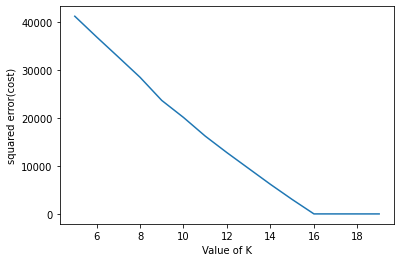

In [6]:
cost2=[]
for i in range(5,20):
  KM2=KMeans(n_clusters=i)
  KM2.fit(X) 
  cost2.append(KM2.inertia_)
plt.plot(range(5,20),cost2)
plt.xlabel('Value of K')
plt.ylabel('squared error(cost)')
plt.show

We take no. of clusters as 16.

#Q:1

In [7]:
km=KMeans(n_clusters=16,random_state=0)

In [8]:
km_result=km.fit(X)

In [9]:
for i in range(len(km_result.labels_)):
  print(km_result.labels_[i],', ', end='')

5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 12 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 10 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 

#Q:2

Since, 'f8.txt' is a high dimensional dataset, therefore we first apply dimensionality reduction using 'PCA' and reduce that to 2-dimensions and then we visualise the clusters as before. 

Now, coming to PCA, it is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using hard mathematics and it uses the eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.

#Q:3

Applying dimensionality reduction using PCA to reduce the dimension to 2-Dimensions

In [10]:
pca=PCA(n_components=2)
pca.fit(X)
pca_data=pd.DataFrame(pca.transform(X))

Printing the reduced dataset

In [11]:
print(pca_data) 

             0         1
0    -1.461680  5.496363
1    -1.280240  5.638116
2    -1.309367  5.637440
3    -1.344251  5.557782
4    -1.334299  5.528360
...        ...       ...
1019 -1.837842 -1.606016
1020 -1.840986 -1.538236
1021 -1.831277 -1.577409
1022 -1.830906 -1.591982
1023 -1.845821 -1.580066

[1024 rows x 2 columns]


Now we're going to apply KMeans on the reduced dataset for clustering

In [12]:
Z=pca_data.to_numpy()

In [13]:
km16=KMeans(n_clusters=16,random_state=None)

In [14]:
km16_result=km16.fit(Z)

Plotting the clusters

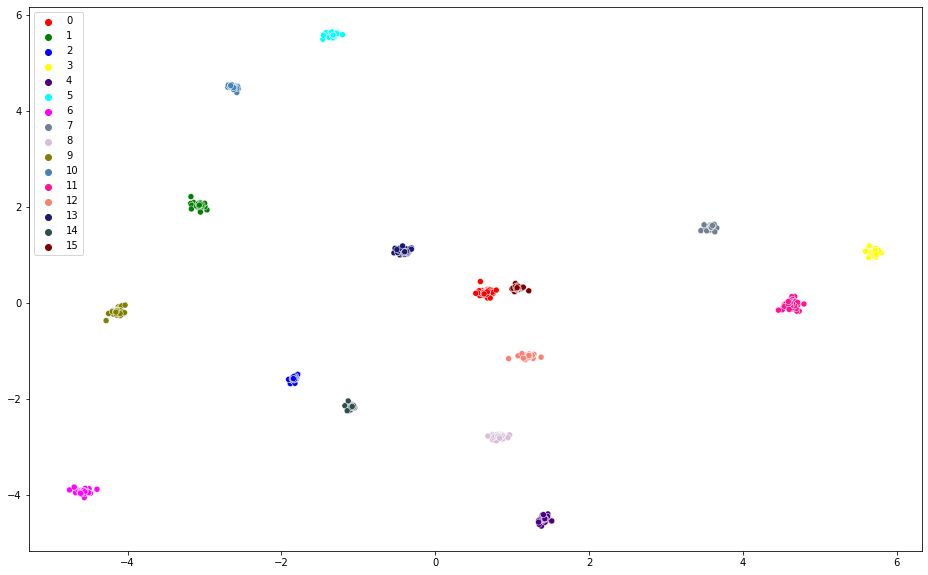

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=Z[:,0],y=Z[:,1],hue=km16_result.labels_,palette=['red','green','blue','yellow','indigo','cyan','magenta','slategrey','thistle','olive','steelblue','deeppink','salmon','midnightblue','darkslategrey','maroon'])

#Q:4

Plotting the cluster centers in the plots thus prepared.

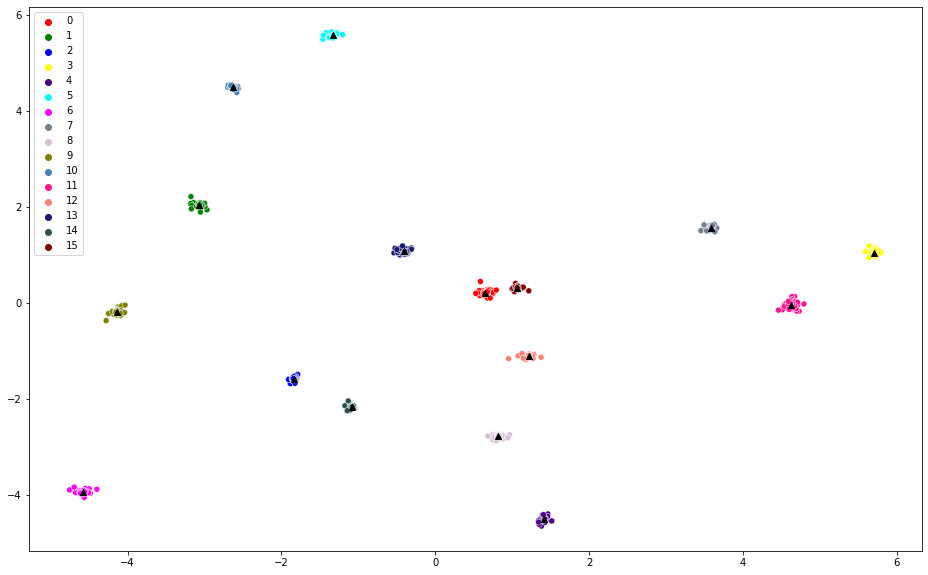

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=Z[:,0],y=Z[:,1],hue=km16_result.labels_,palette=['red','green','blue','yellow','indigo','cyan','magenta','slategrey','thistle','olive','steelblue','deeppink','salmon','midnightblue','darkslategrey','maroon'])
plt.scatter(x=km16_result.cluster_centers_[:,0],y=km16_result.cluster_centers_[:,1],marker="^",color='black')